In [1]:
import os
import sys
sys.path.insert(0, os.path.realpath('__file__'))

import numpy as np
import matplotlib.pyplot as plt
import pickle
import pyidi

%load_ext autoreload
%autoreload 2
%matplotlib inline

C:\Users\Domen\AppData\Local\Programs\Python\Python312\Lib\copy.py:151: DeprecationWarning: Pickle, copy, and deepcopy support will be removed from itertools in Python 3.14.
  rv = reductor(4)
C:\Users\Domen\AppData\Local\Programs\Python\Python312\Lib\copy.py:261: DeprecationWarning: Pickle, copy, and deepcopy support will be removed from itertools in Python 3.14.
  y.__setstate__(state)


Specify the `.cih` file that has the same name as `.mraw` file with images:

In [2]:
filename = 'data/data_showcase.cih'

Make an instance of `pyIDI` class:

In [3]:
video = pyidi.pyIDI(filename)

d:\workspace\_PY_PACKAGES\pyIDI\venv\Lib\site-packages\pyMRAW.py:92: UserWarning: Not 12bit (8 bits)! clipped values?
  warnings.warn('Not 12bit ({:g} bits)! clipped values?'.format(bits))
d:\workspace\_PY_PACKAGES\pyIDI\venv\Lib\site-packages\pyMRAW.py:104: UserWarning: Clipped footage! (Total frame: 75, Original total frame: 15000)
  warnings.warn('Clipped footage! (Total frame: {}, Original total frame: {})'.format(cih['Total Frame'], cih['Original Total Frame'] ))


Information about video can be found in `.info` attribute and images are stored in `.mraw` attribute:

In [4]:
video.reader.info

{'Date': '2018/12/17',
 'Time': '12:48',
 'Camera Type': 'FASTCAM SA-Z type 2100K-M-64GB',
 'Head Type': 'Unknown Child Device',
 'Camera ID': 11,
 'Camera Number': 0,
 'Head Number': 1,
 'Max Head Number': 1,
 'Scene Name': '',
 'User Defined Camera Name': '',
 'Session Number': '',
 'Date Record': 'Unknown',
 'Time Record': 'Unknown',
 'Trigger Time': 0,
 'Record Rate(fps)': 15000,
 'Shutter Speed(s)': '1/15371',
 'Trigger Mode': 'Start',
 'Original Total Frame': 15000,
 'Total Frame': 75,
 'Start Frame': 0,
 'Correct Trigger Frame': 0,
 'Save Step': 100,
 'Image Width': 640,
 'Image Height': 40,
 'Color Type': 'Mono',
 'Color Bit': 8,
 'File Format': 'MRaw',
 'EffectiveBit Depth': 12,
 'EffectiveBit Side': 'Higher',
 'Digits Of File Number': 6,
 'Device Last Error': '-1:0xffffffff',
 'Comment Text': '',
 'AnalogBoard Channel Num': 0,
 'Zero Frame': 'Exist',
 'Shutter Type2(nsec)': 65060,
 'Edge Enhance': 0,
 'Pre LUT Mode': 'DEF1',
 'Pre LUT Brightness': 0,
 'Pre LUT Contrast': 0,
 

d:\workspace\_PY_PACKAGES\pyIDI\pyidi\pyidi.py:268: DeprecationWarning: `self.mraw` is deprecated and will be removed in the next version. Please use `self.reader.mraw` instead.
  warnings.warn('`self.mraw` is deprecated and will be removed in the next version. Please use `self.reader.mraw` instead.', DeprecationWarning)


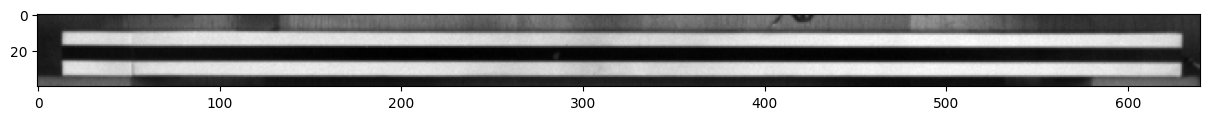

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(video.mraw[0], 'gray')

Points where the displacements will be identified must be determined. Chosen points must have high gradient value.

In [6]:
reference_image = np.average(video.mraw[:10], axis=0)

grad0, grad1 = np.gradient(reference_image)

In [7]:
inds = np.array([[ 26,  20],
               [ 18, 180],
               [ 26, 340],
               [ 26, 500]])

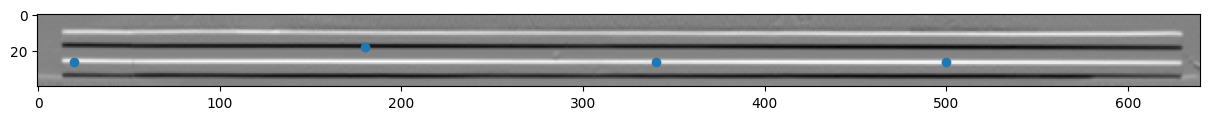

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(grad0, 'gray')
ax.scatter(inds[:, 1], inds[:, 0])

Setting the points and method to be used:

In [9]:
video.set_points(points=inds)
video.set_method('sof')

d:\workspace\_PY_PACKAGES\pyIDI\pyidi\methods\_simplified_optical_flow.py:185: UserWarning: Reference range is larger than the number of images. The reference range is set to (0, N).
  warnings.warn('Reference range is larger than the number of images. The reference range is set to (0, N).')


In [10]:
video.method.configure(subset_size=3) # Configuring the arguments

If the `points` argument is not given and the `method` is supplied to `set_points`, the `get_points` method is triggered. 

`kwargs` can be passed to `get_points`.

In [11]:
# video.set_points(method='simplified_optical_flow', subset=(20, 20), axis=0)

The displacements are identified by calling `get_displacements`

In [12]:
displacements = video.get_displacements()

100%|█████████████████████████████████████████████████████████████| 75/75 [00:00<00:00, 1335.49it/s]
d:\workspace\_PY_PACKAGES\pyIDI\pyidi\methods\_simplified_optical_flow.py:141: UserWarning: Displacement larger than 0.5 pixel
  warnings.warn('Displacement larger than 0.5 pixel')


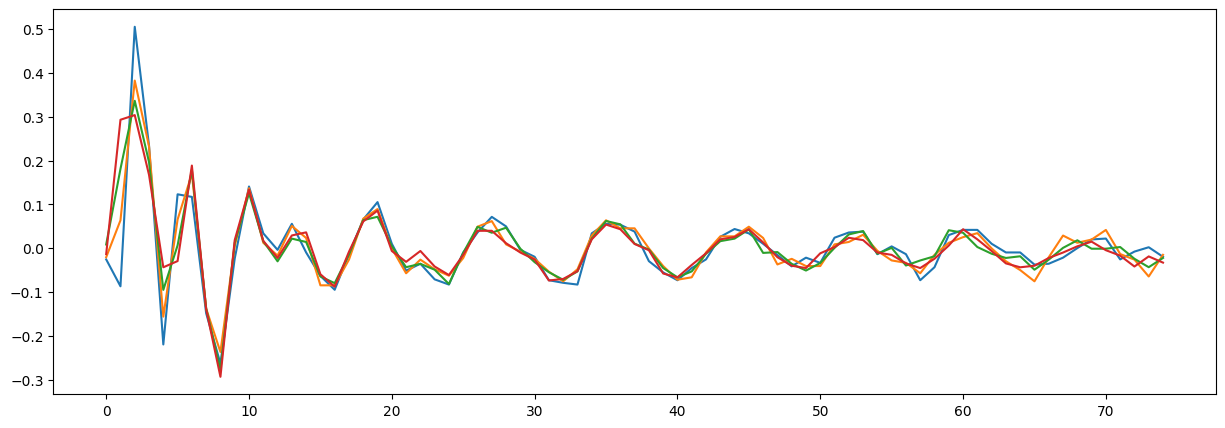

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(displacements[:, :, 0].T);

The identification method can be changed:

In [14]:
video.set_method(method='lk')

Different progress bars can be used (`tqdm` and `atpbar`)

In [15]:
displacements_1 = video.get_displacements(roi_size=19)

--- Starting new analysis ---
 
Interpolating the reference image...
...done in 0.00 s


VBox()

Time to complete: 0.8 s
data\data_showcase_pyidi_analysis\analysis_006\ analysis_006


In [16]:
displacements_1 = video.get_displacements(pbar_type='tqdm')

--- Starting new analysis ---
 
Interpolating the reference image...
...done in 0.00 s


100%|███████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 96.64it/s]

Time to complete: 0.8 s
data\data_showcase_pyidi_analysis\analysis_007\ analysis_007


Results:

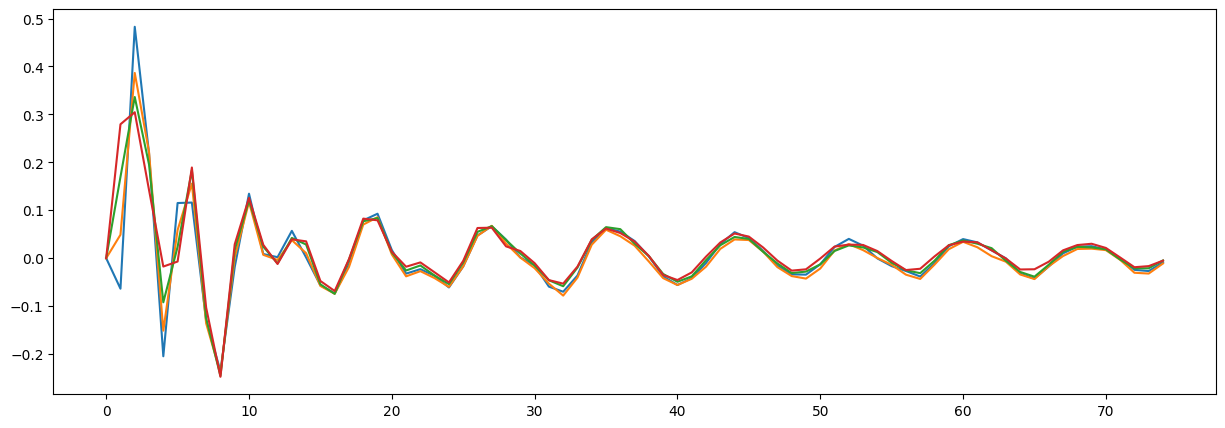

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(displacements_1[:, :, 0].T);

To save the results of calculation, run:

In [18]:
# video.save('filename.pkl')

In [19]:
video.close_video()

# Lucas-Kanade

Lucas-Kanade method is shown on synthetic data.

In [20]:
filename_2 = 'data/data_synthetic.cih'
video_2 = pyidi.pyIDI(filename_2)
video_2.info

d:\workspace\_PY_PACKAGES\pyIDI\pyidi\pyidi.py:273: DeprecationWarning: `self.info` is deprecated and will be removed in the next version. Please use `self.reader.info` instead.
  warnings.warn('`self.info` is deprecated and will be removed in the next version. Please use `self.reader.info` instead.', DeprecationWarning)


{'Date': '2016/08/31',
 'Camera Type': 1,
 'Record Rate(fps)': 1,
 'Shutter Speed(s)': 1.0,
 'Total Frame': 101,
 'Original Total Frame': 101,
 'Start Frame': 0,
 'Image Width': 256,
 'Image Height': 128,
 'Color Type': 'Mono',
 'Color Bit': 16,
 'File Format': 'MRaw',
 'EffectiveBit Depth': 12,
 'EffectiveBit Side': 'Lower',
 'Comment Text': 'Generated sequence.<br>Modify measurement info in<br>created .cih file if necessary.'}

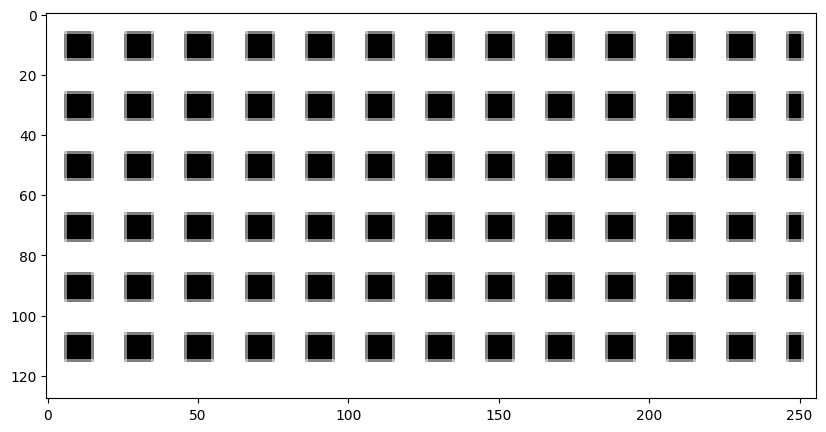

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(video_2.mraw[0], 'gray');

In [22]:
reference_image_2 = np.average(video_2.mraw[:10], axis=0)
grad0_2, grad1_2 = np.gradient(reference_image_2)

In [23]:
inds_2 = np.array([
    [ 31,  35],
    [ 91,  35],
    [ 31, 215],
    [ 91, 215],
    [ 31, 126],
    [ 91, 126],
    [ 66,  71],
    [ 35,  71],
    [ 95,  71],
    [ 66, 191],
    [ 35, 191],
    [ 95, 191]
])

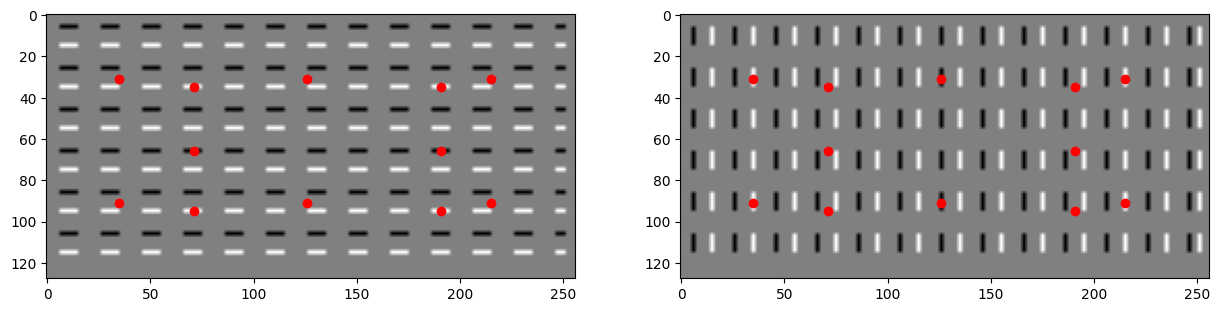

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].imshow(grad0_2, 'gray')
ax[0].scatter(inds_2[:, 1], inds_2[:, 0], c='r')
ax[1].imshow(grad1_2, 'gray')
ax[1].scatter(inds_2[:, 1], inds_2[:, 0], c='r');

In [25]:
generated_t, generated_x, generated_y = np.load('./data/data_synthetic_generated.npy')

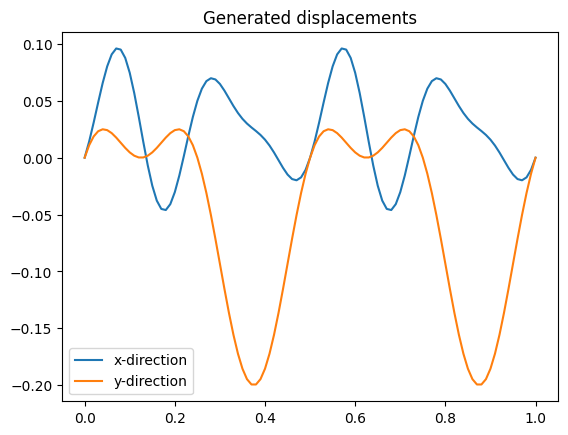

In [26]:
plt.plot(generated_t, generated_x, label='x-direction')
plt.plot(generated_t, generated_y, label='y-direction')
plt.title('Generated displacements')
plt.legend();

In [27]:
video_2.set_method('lk')
video_2.set_points(points=inds_2)

In [28]:
video_2.method.configure(show_pbar=False)

For accurate results, make sure at least 2 "speckles" are inside the ROI.

--- Starting new analysis ---
 
Interpolating the reference image...
...done in 0.00 s
Time to complete: 1.3 s
data\data_synthetic_pyidi_analysis\analysis_002\ analysis_002


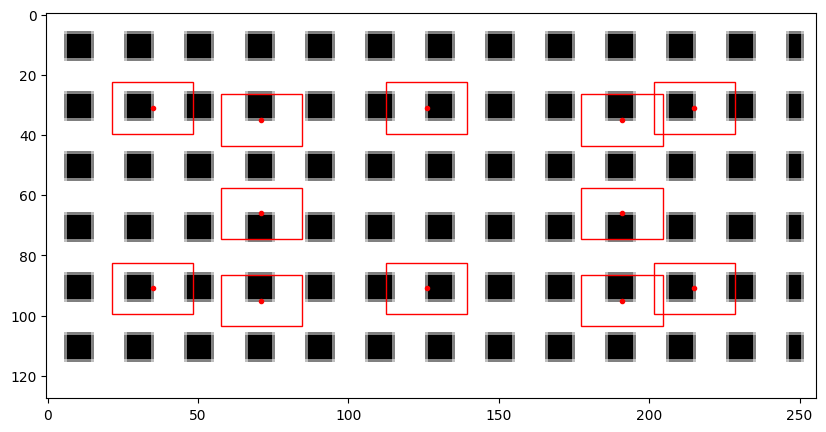

In [29]:
disp_2 = video_2.get_displacements(roi_size=(17, 27), int_order=1)
video_2.show_points()

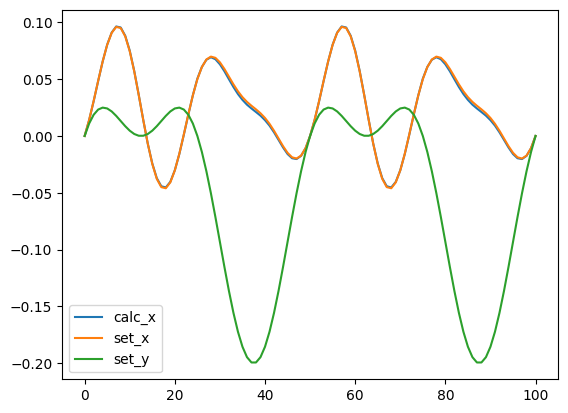

In [30]:
plt.plot(disp_2[0, :, 1] - disp_2[0, 0, 1], label='calc_x')
plt.plot(generated_x, label='set_x')
plt.plot(generated_y, label='set_y')
plt.legend()

The method can be changed and displacement calculated again:

In [31]:
video_2.set_method('sof')

In [32]:
disp_2_sof = video_2.get_displacements()

100%|████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 698.55it/s]


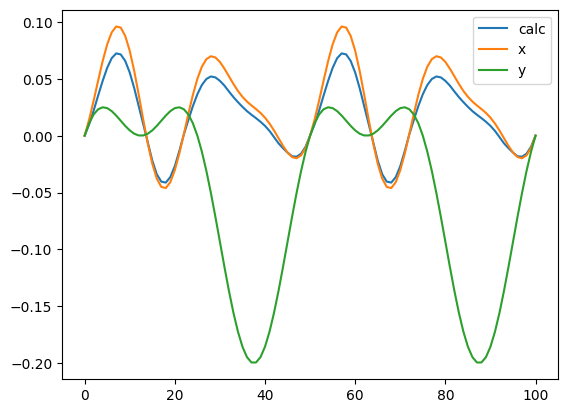

In [33]:
plt.plot(disp_2_sof[0, :, 1] - disp_2_sof[0, 0, 1], label='calc')
plt.plot(generated_x, label='x')
plt.plot(generated_y, label='y')
plt.legend()

# Multiprocessing
When using the Lucas-Kanade method, the identification can be slow, especially when large number of points is used. To reduce the computation time you can use multiprocessing:

In [34]:
video_2.set_method('lk')

Other configurations can be made:

In [35]:
video_2.method.configure(int_order=1, roi_size=(25, 25), pbar_type='atpbar', multi_type='mantichora')

In [36]:
disp_multi = video_2.get_displacements(processes=4, resume_analysis=False)

--- Starting new analysis ---
 
Computation start: 2024-05-16 08:36:38.451276


VBox()

Computation duration: 00:00:11.78
data\data_synthetic_pyidi_analysis\analysis_003\ analysis_003


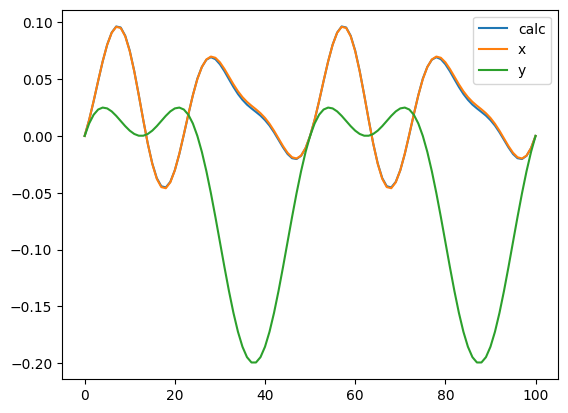

In [37]:
plt.plot(disp_multi[0, :, 1] - disp_multi[0, 0, 1], label='calc')
plt.plot(generated_x, label='x')
plt.plot(generated_y, label='y')
plt.legend()

You can monitor the progress in the command line.

In [38]:
video_2.close_video()

# Analyzing other video formats

Along with the Photron MRAW, PyIDI also supports loading images in the `numpy.ndarray` (or `numpy.memmap`) format.

You can use this feature to analyze any images that can be loaded into Numpy.

PyIDI currently only supports grayscale images, structured into 3D Numpy array objects shaped `(n_images, height, width)`.

To load a video from a Numpy array object, simply pass the array into `pyidi.pyIDI` instead of the `.cih` file path:


In [39]:
import pyMRAW
memmap_video, _ = pyMRAW.load_video(filename_2)
array_video = np.array(memmap_video)

In [40]:
type(array_video), array_video.shape

(numpy.ndarray, (101, 128, 256))

The resulting `pyIDI` object can now be used normally:

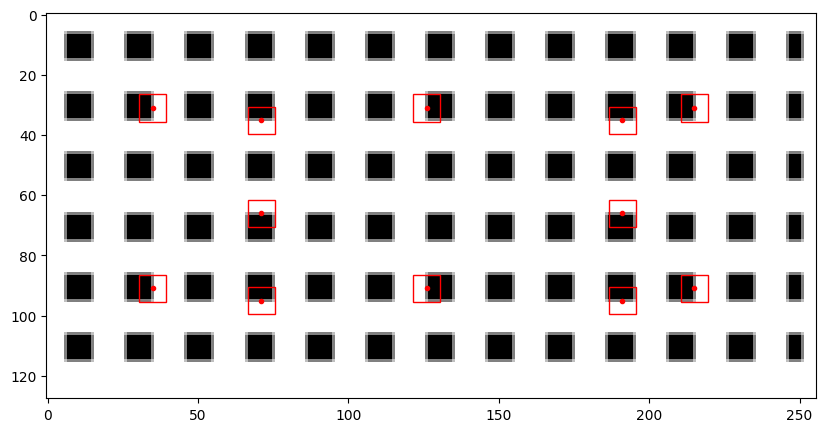

In [41]:
video_3 = pyidi.pyIDI(array_video, root='./temp')
video_3.set_method('lk')
video_3.set_points(points=inds_2)
video_3.show_points()

In [42]:
d3 = video_3.get_displacements()

--- Starting new analysis ---
 
Interpolating the reference image...
...done in 0.00 s


VBox()

Time to complete: 1.8 s


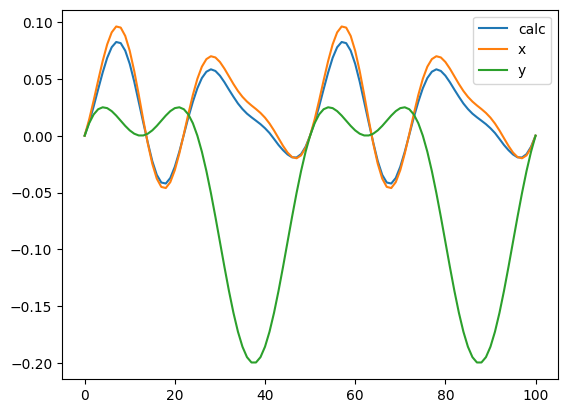

In [43]:
plt.plot(d3[2, :, 1] - d3[2, 0, 1], label='calc')
plt.plot(generated_x, label='x')
plt.plot(generated_y, label='y')
plt.legend()

In [44]:
video_3.close_video()